In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

In [3]:
data = pd.read_csv('C:/Users/Abhi/Desktop/CSV files/Diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:>

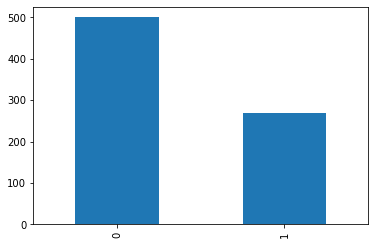

In [4]:
import seaborn as sns
data['Outcome'].value_counts().plot(kind = 'bar')

In [5]:
# splitting data 
X = data.iloc[:,0:8]
y = data.iloc[:,8]


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(576, 8) (576,)
(192, 8) (192,)


In [8]:
model = Sequential()
model.add(Dense(16, input_dim = 8, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [12]:
# compiling model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [13]:
# Fitting 
model.fit(X_train, y_train, epochs=100, batch_size = 10)

Epoch 1/100
58/58 [==============================] - 0s 2ms/step - loss: 7.3776 - accuracy: 0.4410
Epoch 2/100
58/58 [==============================] - 0s 2ms/step - loss: 2.8330 - accuracy: 0.4670
Epoch 3/100
58/58 [==============================] - 0s 2ms/step - loss: 2.3330 - accuracy: 0.4774
Epoch 4/100
58/58 [==============================] - 0s 2ms/step - loss: 2.0597 - accuracy: 0.4497
Epoch 5/100
58/58 [==============================] - 0s 2ms/step - loss: 1.7288 - accuracy: 0.5104
Epoch 6/100
58/58 [==============================] - 0s 2ms/step - loss: 1.4499 - accuracy: 0.5017
Epoch 7/100
58/58 [==============================] - 0s 2ms/step - loss: 1.2877 - accuracy: 0.5035
Epoch 8/100
58/58 [==============================] - 0s 2ms/step - loss: 1.1243 - accuracy: 0.5330
Epoch 9/100
58/58 [==============================] - 0s 2ms/step - loss: 1.0441 - accuracy: 0.5503
Epoch 10/100
58/58 [==============================] - 0s 2ms/step - loss: 0.9433 - accuracy: 0.5590
Epoch 11/

58/58 [==============================] - 0s 2ms/step - loss: 0.5116 - accuracy: 0.7396
Epoch 84/100
58/58 [==============================] - 0s 2ms/step - loss: 0.5449 - accuracy: 0.7483
Epoch 85/100
58/58 [==============================] - 0s 2ms/step - loss: 0.5198 - accuracy: 0.7396
Epoch 86/100
58/58 [==============================] - 0s 2ms/step - loss: 0.5104 - accuracy: 0.7569
Epoch 87/100
58/58 [==============================] - 0s 2ms/step - loss: 0.4896 - accuracy: 0.7535
Epoch 88/100
58/58 [==============================] - 0s 2ms/step - loss: 0.5328 - accuracy: 0.7500
Epoch 89/100
58/58 [==============================] - 0s 2ms/step - loss: 0.5107 - accuracy: 0.7587
Epoch 90/100
58/58 [==============================] - 0s 2ms/step - loss: 0.5358 - accuracy: 0.7378
Epoch 91/100
58/58 [==============================] - 0s 2ms/step - loss: 0.5090 - accuracy: 0.7431
Epoch 92/100
58/58 [==============================] - 0s 2ms/step - loss: 0.5683 - accuracy: 0.7135
Epoch 93/100


In [14]:
# Train accuracy
_, accuracy = model.evaluate(X_train, y_train)
print('Train accuracy: %.2f' % (accuracy*100))

18/18 [==============================] - 0s 2ms/step - loss: 0.4819 - accuracy: 0.7656
Train accuracy: 76.56


In [15]:
# Test accuracy
from sklearn.metrics import accuracy_score
y_pred = model.predict_classes(X_test)
accuracy_score(y_test, y_pred)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


0.7552083333333334